In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/electronics_ratings.csv'
dataset = pd.read_csv(file_path)

In [2]:
min_rating = dataset['rating'].min()
max_rating = dataset['rating'].max()

In [3]:
if min_rating < 1 or max_rating > 5:
    dataset['rating'] = ((dataset['rating'] - min_rating) / (max_rating - min_rating)) * 4 + 1
    dataset['rating'] = dataset['rating'].round().astype(int)

In [4]:
Tnu = dataset['userId'].nunique()
Tni = dataset['productId'].nunique()

print(f"Total number of users (Tnu): {Tnu}")
print(f"Total number of items (Tni): {Tni}")

Total number of users (Tnu): 100
Total number of items (Tni): 50


In [5]:
ratings_per_product = dataset['productId'].value_counts()
print("\nNumber of ratings for every product:")
print(ratings_per_product)



Number of ratings for every product:
productId
P040    27
P029    27
P037    25
P034    25
P025    23
P017    22
P026    22
P045    21
P015    21
P024    21
P008    20
P011    20
P047    20
P033    20
P035    20
P023    19
P002    19
P030    19
P032    19
P049    19
P038    19
P012    18
P046    18
P009    18
P004    18
P003    18
P007    17
P022    17
P006    17
P018    17
P044    17
P005    17
P043    17
P020    16
P031    16
P036    16
P013    16
P042    15
P050    15
P010    15
P039    15
P014    15
P021    15
P001    15
P028    14
P019    14
P027    14
P041    13
P048    11
P016    10
Name: count, dtype: int64


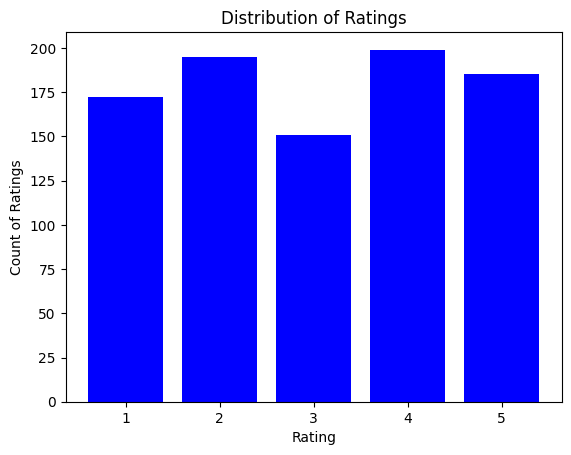

In [6]:
rating_distribution = dataset['rating'].value_counts().sort_index()

plt.bar(rating_distribution.index, rating_distribution.values, color='blue')
plt.xlabel('Rating')
plt.ylabel('Count of Ratings')
plt.title('Distribution of Ratings')
plt.show()

In [7]:
total_possible_ratings = Tnu * Tni
total_actual_ratings = len(dataset)
sparsity = 1 - (total_actual_ratings / total_possible_ratings)
print(f"\nMatrix Sparsity: {sparsity:.2%}")


Matrix Sparsity: 81.96%


In [8]:
mean_rating_per_product = dataset.groupby('productId')['rating'].mean()
bias = mean_rating_per_product.std()
print(f"Bias Level: {bias:.2f}")

Bias Level: 0.31


In [9]:
lowest_rated_items = mean_rating_per_product.nsmallest(2).index.tolist()
target_item_11, target_item_12 = lowest_rated_items
print(f"\nLowest-rated items (target items): {target_item_11}, {target_item_12}")


Lowest-rated items (target items): P036, P003


In [10]:
target_item_11 = 'P036'
target_item_12 = 'P003'

avg_rating_I1 = dataset[dataset['productId'] == target_item_11]['rating'].mean()
avg_rating_I2 = dataset[dataset['productId'] == target_item_12]['rating'].mean()

print(f"Average rating for {target_item_11}: {avg_rating_I1}")
print(f"Average rating for {target_item_12}: {avg_rating_I2}")

Average rating for P036: 2.1875
Average rating for P003: 2.5


In [12]:
rating_matrix = dataset.pivot(index='userId', columns='productId', values='rating')
rating_matrix_filled = rating_matrix.copy()

rating_matrix_filled[target_item_11].fillna(avg_rating_I1, inplace=True)
rating_matrix_filled[target_item_12].fillna(avg_rating_I2, inplace=True)

print("Mean-filling applied for target items.")

Mean-filling applied for target items.


<ipython-input-12-b81309a8c1ea>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rating_matrix_filled[target_item_11].fillna(avg_rating_I1, inplace=True)
<ipython-input-12-b81309a8c1ea>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [13]:
item_mean_ratings = rating_matrix.mean()
print("\nAverage rating for each item:")
print(item_mean_ratings)


Average rating for each item:
productId
P001    3.000000
P002    2.631579
P003    2.500000
P004    3.444444
P005    3.411765
P006    3.470588
P007    3.352941
P008    3.050000
P009    3.166667
P010    2.733333
P011    3.050000
P012    2.722222
P013    2.750000
P014    3.200000
P015    3.476190
P016    2.500000
P017    2.818182
P018    2.529412
P019    2.857143
P020    2.875000
P021    3.333333
P022    2.705882
P023    3.315789
P024    2.952381
P025    3.434783
P026    3.227273
P027    3.000000
P028    2.857143
P029    3.370370
P030    2.947368
P031    2.875000
P032    3.052632
P033    3.000000
P034    3.440000
P035    2.950000
P036    2.187500
P037    3.200000
P038    2.894737
P039    3.466667
P040    3.111111
P041    2.769231
P042    2.866667
P043    2.647059
P044    3.235294
P045    2.714286
P046    3.166667
P047    3.100000
P048    2.545455
P049    3.210526
P050    3.400000
dtype: float64


In [14]:
rating_diff_matrix = rating_matrix.sub(item_mean_ratings, axis=1)
print("\nDifference matrix between ratings and mean ratings:")
print(rating_diff_matrix)

cov_matrix = rating_diff_matrix.cov()
print("\nCovariance matrix:")
print(cov_matrix)


Difference matrix between ratings and mean ratings:
productId  P001      P002  P003      P004      P005      P006      P007  P008  \
userId                                                                          
U001        NaN       NaN  -0.5       NaN       NaN       NaN       NaN   NaN   
U002        NaN       NaN   NaN  0.555556       NaN  0.529412       NaN   NaN   
U003        NaN       NaN   NaN       NaN       NaN       NaN       NaN   NaN   
U004        NaN -1.631579   NaN       NaN       NaN       NaN       NaN   NaN   
U005        NaN       NaN   NaN       NaN       NaN -1.470588       NaN   NaN   
...         ...       ...   ...       ...       ...       ...       ...   ...   
U096        NaN       NaN   NaN       NaN       NaN       NaN       NaN   NaN   
U097       -1.0       NaN   NaN       NaN -1.411765       NaN  1.647059   NaN   
U098        NaN       NaN   NaN  0.555556       NaN       NaN -0.352941   NaN   
U099        NaN  1.368421   NaN  0.555556       NaN     

In [15]:
def get_top_peers(item_id, n_peers, cov_matrix):
    correlations = cov_matrix[item_id].dropna().sort_values(ascending=False)
    return correlations.index[1:n_peers + 1].tolist()

top_5_peers_I1 = get_top_peers(target_item_11, 5, cov_matrix)
top_10_peers_I1 = get_top_peers(target_item_11, 10, cov_matrix)
top_5_peers_I2 = get_top_peers(target_item_12, 5, cov_matrix)
top_10_peers_I2 = get_top_peers(target_item_12, 10, cov_matrix)

print(f"\nTop 5 peers for {target_item_11}: {top_5_peers_I1}")
print(f"Top 10 peers for {target_item_11}: {top_10_peers_I1}")
print(f"Top 5 peers for {target_item_12}: {top_5_peers_I2}")
print(f"Top 10 peers for {target_item_12}: {top_10_peers_I2}")


Top 5 peers for P036: ['P030', 'P006', 'P020', 'P004', 'P009']
Top 10 peers for P036: ['P030', 'P006', 'P020', 'P004', 'P009', 'P012', 'P027', 'P035', 'P036', 'P014']
Top 5 peers for P003: ['P013', 'P011', 'P039', 'P003', 'P041']
Top 10 peers for P003: ['P013', 'P011', 'P039', 'P003', 'P041', 'P002', 'P028', 'P048', 'P005', 'P022']


In [16]:
reduced_matrix_5_I1 = rating_matrix_filled[top_5_peers_I1]
reduced_matrix_5_I2 = rating_matrix_filled[top_5_peers_I2]

predictions_5_I1 = reduced_matrix_5_I1.mean(axis=1)
predictions_5_I2 = reduced_matrix_5_I2.mean(axis=1)

print(f"\nRating predictions for {target_item_11} using top 5 peers:")
print(predictions_5_I1)
print(f"Rating predictions for {target_item_12} using top 5 peers:")
print(predictions_5_I2)


Rating predictions for P036 using top 5 peers:
userId
U001    NaN
U002    4.0
U003    NaN
U004    NaN
U005    2.0
       ... 
U096    NaN
U097    NaN
U098    4.5
U099    4.5
U100    NaN
Length: 100, dtype: float64
Rating predictions for P003 using top 5 peers:
userId
U001    2.000000
U002    3.250000
U003    3.750000
U004    2.500000
U005    2.750000
          ...   
U096    2.500000
U097    2.250000
U098    1.833333
U099    2.750000
U100    2.833333
Length: 100, dtype: float64


In [17]:
reduced_matrix_10_I1 = rating_matrix_filled[top_10_peers_I1]
reduced_matrix_10_I2 = rating_matrix_filled[top_10_peers_I2]

predictions_10_I1 = reduced_matrix_10_I1.mean(axis=1)
predictions_10_I2 = reduced_matrix_10_I2.mean(axis=1)

print(f"\nRating predictions for {target_item_11} using top 10 peers:")
print(predictions_10_I1)
print(f"Rating predictions for {target_item_12} using top 10 peers:")
print(predictions_10_I2)


Rating predictions for P036 using top 10 peers:
userId
U001    1.000000
U002    3.046875
U003    2.187500
U004    4.000000
U005    1.729167
          ...   
U096    4.062500
U097    2.187500
U098    3.729167
U099    4.237500
U100    2.187500
Length: 100, dtype: float64
Rating predictions for P003 using top 10 peers:
userId
U001    2.000000
U002    3.833333
U003    3.833333
U004    1.750000
U005    2.750000
          ...   
U096    2.500000
U097    2.166667
U098    1.833333
U099    3.300000
U100    2.375000
Length: 100, dtype: float64


In [18]:
comparison_I1 = pd.DataFrame({'Top 5 Peers': predictions_5_I1, 'Top 10 Peers': predictions_10_I1})
comparison_I2 = pd.DataFrame({'Top 5 Peers': predictions_5_I2, 'Top 10 Peers': predictions_10_I2})

print(f"\nComparison of predictions for {target_item_11}:")
print(comparison_I1)
print(f"\nComparison of predictions for {target_item_12}:")
print(comparison_I2)


Comparison of predictions for P036:
        Top 5 Peers  Top 10 Peers
userId                           
U001            NaN      1.000000
U002            4.0      3.046875
U003            NaN      2.187500
U004            NaN      4.000000
U005            2.0      1.729167
...             ...           ...
U096            NaN      4.062500
U097            NaN      2.187500
U098            4.5      3.729167
U099            4.5      4.237500
U100            NaN      2.187500

[100 rows x 2 columns]

Comparison of predictions for P003:
        Top 5 Peers  Top 10 Peers
userId                           
U001       2.000000      2.000000
U002       3.250000      3.833333
U003       3.750000      3.833333
U004       2.500000      1.750000
U005       2.750000      2.750000
...             ...           ...
U096       2.500000      2.500000
U097       2.250000      2.166667
U098       1.833333      1.833333
U099       2.750000      3.300000
U100       2.833333      2.375000

[100 rows x 2 col

In [21]:
import numpy as np
import pandas as pd

def mle_covariance_matrix(rating_matrix):
    items = rating_matrix.columns
    cov_matrix = pd.DataFrame(0, index=items, columns=items, dtype=float)

    for item_i in items:
        for item_j in items:
            common_users = rating_matrix[[item_i, item_j]].dropna()
            if len(common_users) > 0:
                cov = np.cov(common_users[item_i], common_users[item_j])[0, 1]
            else:
                cov = 0
            cov_matrix.loc[item_i, item_j] = cov
    return cov_matrix

mle_cov_matrix = mle_covariance_matrix(rating_matrix)
print("\nMLE Covariance Matrix:")
print(mle_cov_matrix)

<ipython-input-21-59c85bc7f251>:12: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(common_users[item_i], common_users[item_j])[0, 1]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
<ipython-input-21-59c85bc7f251>:12: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(common_users[item_i], common_users[item_j])[0, 1]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
<ipython-input-21-59c85bc7f251>:12: RuntimeWarning: Degrees of freed


MLE Covariance Matrix:
productId      P001      P002      P003      P004      P005      P006  \
productId                                                               
P001       0.000000  1.583333  0.000000 -3.000000  0.000000  0.850000   
P002       1.583333  0.000000  2.333333 -0.500000  0.000000 -1.666667   
P003       0.000000  2.333333  0.000000  0.166667  0.416667 -1.750000   
P004      -3.000000 -0.500000  0.166667  0.000000  1.200000 -1.333333   
P005       0.000000  0.000000  0.416667  1.200000  0.000000       NaN   
P006       0.850000 -1.666667 -1.750000 -1.333333       NaN  0.000000   
P007      -1.333333  8.000000       NaN  1.000000 -0.400000  0.000000   
P008      -2.333333  1.000000 -3.000000  0.000000  0.083333  2.000000   
P009      -0.333333 -1.000000 -0.166667 -0.500000 -0.050000  6.000000   
P010            NaN -1.500000  0.000000  0.000000 -0.500000 -3.000000   
P011            NaN       NaN  3.000000  0.416667 -0.500000  0.300000   
P012      -2.000000  0.0000

<ipython-input-21-59c85bc7f251>:12: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(common_users[item_i], common_users[item_j])[0, 1]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [22]:
def get_top_peers_mle(item_id, n_peers, cov_matrix):
    correlations = cov_matrix[item_id].dropna().sort_values(ascending=False)
    return correlations.index[1:n_peers + 1].tolist()

top_5_peers_mle_I1 = get_top_peers_mle(target_item_11, 5, mle_cov_matrix)
top_10_peers_mle_I1 = get_top_peers_mle(target_item_11, 10, mle_cov_matrix)
top_5_peers_mle_I2 = get_top_peers_mle(target_item_12, 5, mle_cov_matrix)
top_10_peers_mle_I2 = get_top_peers_mle(target_item_12, 10, mle_cov_matrix)

print(f"\nTop 5 peers (MLE) for {target_item_11}: {top_5_peers_mle_I1}")
print(f"Top 10 peers (MLE) for {target_item_11}: {top_10_peers_mle_I1}")
print(f"Top 5 peers (MLE) for {target_item_12}: {top_5_peers_mle_I2}")
print(f"Top 10 peers (MLE) for {target_item_12}: {top_10_peers_mle_I2}")


Top 5 peers (MLE) for P036: ['P006', 'P030', 'P020', 'P004', 'P009']
Top 10 peers (MLE) for P036: ['P006', 'P030', 'P020', 'P004', 'P009', 'P012', 'P027', 'P035', 'P014', 'P010']
Top 5 peers (MLE) for P003: ['P013', 'P039', 'P011', 'P041', 'P002']
Top 10 peers (MLE) for P003: ['P013', 'P039', 'P011', 'P041', 'P002', 'P028', 'P048', 'P005', 'P022', 'P021']


In [23]:
reduced_matrix_mle_5_I1 = rating_matrix_filled[top_5_peers_mle_I1]
reduced_matrix_mle_5_I2 = rating_matrix_filled[top_5_peers_mle_I2]

predictions_mle_5_I1 = reduced_matrix_mle_5_I1.mean(axis=1)
predictions_mle_5_I2 = reduced_matrix_mle_5_I2.mean(axis=1)

print(f"\nRating predictions (MLE) for {target_item_11} using top 5 peers:")
print(predictions_mle_5_I1)
print(f"Rating predictions (MLE) for {target_item_12} using top 5 peers:")
print(predictions_mle_5_I2)


Rating predictions (MLE) for P036 using top 5 peers:
userId
U001    NaN
U002    4.0
U003    NaN
U004    NaN
U005    2.0
       ... 
U096    NaN
U097    NaN
U098    4.5
U099    4.5
U100    NaN
Length: 100, dtype: float64
Rating predictions (MLE) for P003 using top 5 peers:
userId
U001    2.000000
U002    4.000000
U003    5.000000
U004    1.000000
U005    3.000000
          ...   
U096         NaN
U097    2.000000
U098    1.500000
U099    3.500000
U100    2.333333
Length: 100, dtype: float64


In [24]:
reduced_matrix_mle_10_I1 = rating_matrix_filled[top_10_peers_mle_I1]
reduced_matrix_mle_10_I2 = rating_matrix_filled[top_10_peers_mle_I2]

predictions_mle_10_I1 = reduced_matrix_mle_10_I1.mean(axis=1)
predictions_mle_10_I2 = reduced_matrix_mle_10_I2.mean(axis=1)

print(f"\nRating predictions (MLE) for {target_item_11} using top 10 peers:")
print(predictions_mle_10_I1)
print(f"Rating predictions (MLE) for {target_item_12} using top 10 peers:")
print(predictions_mle_10_I2)



Rating predictions (MLE) for P036 using top 10 peers:
userId
U001    1.000000
U002    3.333333
U003         NaN
U004    3.000000
U005    1.500000
          ...   
U096    4.666667
U097         NaN
U098    4.500000
U099    4.750000
U100         NaN
Length: 100, dtype: float64
Rating predictions (MLE) for P003 using top 10 peers:
userId
U001    2.000000
U002    4.500000
U003    4.500000
U004    1.000000
U005    3.500000
          ...   
U096         NaN
U097    2.000000
U098    1.500000
U099    3.500000
U100    2.333333
Length: 100, dtype: float64


In [25]:
import numpy as np
from numpy.linalg import eig, norm

ratings_matrix = np.array([
    [5, 0, 2, 3, 3],
    [3, 2, 0, 0, 0],
    [4, 3, 5, 3, 5],
    [2, 0, 1, 0, 4],
    [5, 3, 0, 3, 4]
])

In [26]:
average_ratings = np.nanmean(np.where(ratings_matrix == 0, np.nan, ratings_matrix), axis=0)
print("Average ratings for each item:", average_ratings)

Average ratings for each item: [3.8        2.66666667 2.66666667 3.         4.        ]


In [27]:
ratings_matrix_filled = np.where(ratings_matrix == 0, average_ratings, ratings_matrix)
print("\nRatings matrix after mean-filling:")
print(ratings_matrix_filled)


Ratings matrix after mean-filling:
[[5.         2.66666667 2.         3.         3.        ]
 [3.         2.         2.66666667 3.         4.        ]
 [4.         3.         5.         3.         5.        ]
 [2.         2.66666667 1.         3.         4.        ]
 [5.         3.         2.66666667 3.         4.        ]]


In [28]:
cov_matrix = np.cov(ratings_matrix_filled.T)
eigenvalues, eigenvectors = eig(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)


Eigenvalues:
[2.7851271  1.55882235 0.02112548 0.1682584  0.        ]

Eigenvectors:
[[-0.488043   -0.81441181 -0.30708069  0.06518348  0.        ]
 [-0.11578809 -0.06855384  0.54192826  0.82958258  0.        ]
 [-0.8353352   0.36528896  0.2990078  -0.28173288  0.        ]
 [ 0.          0.          0.          0.          1.        ]
 [-0.2249939   0.44564308 -0.72291738  0.47767191  0.        ]]


In [29]:
def check_orthogonality(vectors):
    n = vectors.shape[1]
    for i in range(n):
        for j in range(i + 1, n):
            dot_product = np.dot(vectors[:, i], vectors[:, j])
            if not np.isclose(dot_product, 0):
                return False
    return True

is_orthogonal = check_orthogonality(eigenvectors)
print("\nAre the eigenvectors orthogonal?", is_orthogonal)


Are the eigenvectors orthogonal? True


In [30]:
v1 = eigenvectors[:, np.argmax(eigenvalues)]
e1 = v1

e1 = e1 / norm(e1)
print("\nFirst orthonormal vector (e1):", e1)


First orthonormal vector (e1): [-0.488043   -0.11578809 -0.8353352   0.         -0.2249939 ]


In [31]:
sigma1 = eigenvalues[np.argmax(eigenvalues)]
print("\nHighest eigenvalue (σ1):", sigma1)


Highest eigenvalue (σ1): 2.7851271025345214


In [32]:
A = ratings_matrix_filled
u1 = np.dot(A, e1) / sigma1
print("\nPredicted vector û1:", u1)


Predicted vector û1: [-1.82922902 -1.73178499 -2.72920462 -1.08439038 -2.12382242]


In [33]:
v2 = eigenvectors[:, np.argsort(eigenvalues)[-2]]
proj_u1_v2 = np.dot(u1[:5], v2) * v2
print("\nProjection of û1 on v2:", proj_u1_v2)




Projection of û1 on v2: [ 0.27278628  0.02296203 -0.12235311 -0.         -0.14926763]


In [34]:
u2 = v2 - proj_u1_v2
print("\nNew orthonormal vector (before normalization):", u2)


New orthonormal vector (before normalization): [-1.08719809 -0.09151587  0.48764207  0.          0.5949107 ]


In [35]:
e2 = u2 / norm(u2)
print("\nSecond orthonormal vector (e2):", e2)


Second orthonormal vector (e2): [-0.81441181 -0.06855384  0.36528896  0.          0.44564308]
